In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine, load_diabetes
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_validate, train_test_split

In [69]:
data = load_wine()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Árvores de Decisão

In [85]:
min_samples_leaf = [1, 2, 5, 10]

for min_sample_leaf in min_samples_leaf:
  dt_results = cross_validate(DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_sample_leaf),
                              X_train, 
                              y_train, 
                              cv=10, 
                              scoring=['f1_macro'], 
                              return_train_score=True)
  
  print("min_samples_leaf:", min_sample_leaf,
        "| Train F1:", dt_results['train_f1_macro'].mean(),
        "| Validation F1:", dt_results['test_f1_macro'].mean()
  )

min_samples_leaf: 1 | Train F1: 1.0 | Validation F1: 0.8894179894179894
min_samples_leaf: 2 | Train F1: 0.9813951150522087 | Validation F1: 0.8935113035113034
min_samples_leaf: 5 | Train F1: 0.961289649253175 | Validation F1: 0.9045189995189995
min_samples_leaf: 10 | Train F1: 0.9229374891029367 | Validation F1: 0.8684078884078884


In [93]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test:", f1_score(y_test, y_pred, average='macro'))

Test: 0.8510989010989012


[Text(0.5, 0.875, 'X[11] <= 2.19\nentropy = 1.567\nsamples = 124\nvalue = [40, 50, 34]\nclass = y[1]'),
 Text(0.3, 0.625, 'X[10] <= 0.898\nentropy = 0.61\nsamples = 40\nvalue = [0, 6, 34]\nclass = y[2]'),
 Text(0.2, 0.375, 'X[6] <= 1.235\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]\nclass = y[2]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = y[2]'),
 Text(0.3, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]\nclass = y[2]'),
 Text(0.4, 0.375, 'entropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]\nclass = y[1]'),
 Text(0.7, 0.625, 'X[0] <= 12.785\nentropy = 0.998\nsamples = 84\nvalue = [40, 44, 0]\nclass = y[1]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = y[1]'),
 Text(0.8, 0.375, 'X[9] <= 3.82\nentropy = 0.503\nsamples = 45\nvalue = [40, 5, 0]\nclass = y[0]'),
 Text(0.7, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5, 0]\nclass = y[1]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclas

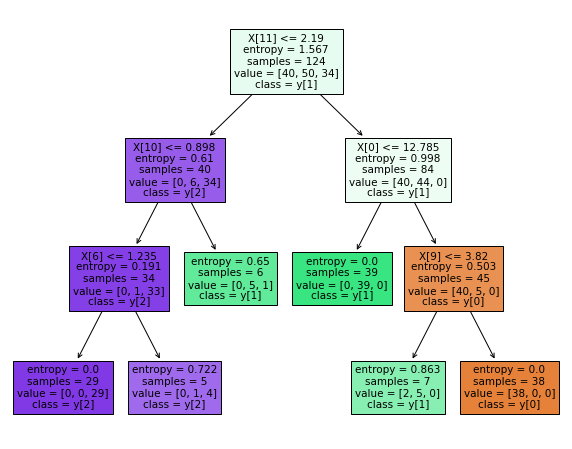

In [96]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

plot_tree(clf, filled=True, class_names=True)

# Random Forest

In [ ]:
data = load_wine()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_samples = [0.5, None]
n_estimators = [100, 200]
max_features = ['sqrt']

for n_estimator in n_estimators:
  for max_sample in max_samples:
    for max_feature in max_features:        
      rf_results = cross_validate(RandomForestClassifier(criterion='entropy', 
                                                         max_samples=max_sample, 
                                                         max_features=max_feature,
                                                         n_estimators=n_estimator), 
                                  X_train, 
                                  y_train, 
                                  cv=10, 
                                  scoring=['f1_macro'], 
                                  return_train_score=True)
      
      print("max_samples:", max_sample, 
            "n_estimators", n_estimator,
            "max_features", max_feature,
            "| Train F1:", rf_results['train_f1_macro'].mean(),
            "| Validation F1:", rf_results['test_f1_macro'].mean()
      )

max_samples: 0.5 n_estimators 100 max_features sqrt | Train F1: 1.0 | Validation F1: 0.968994708994709
max_samples: None n_estimators 100 max_features sqrt | Train F1: 1.0 | Validation F1: 0.968994708994709
max_samples: 0.5 n_estimators 200 max_features sqrt | Train F1: 1.0 | Validation F1: 0.9767195767195768
max_samples: None n_estimators 200 max_features sqrt | Train F1: 1.0 | Validation F1: 0.968994708994709


In [ ]:
clf = RandomForestClassifier(
    criterion='entropy', 
    max_samples=0.5, 
    max_features='sqrt',
    n_estimators=200) 

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test:", f1_score(y_test, y_pred, average='macro'))
print()

Test: 1.0



# Projeto de classificação

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hype-usp/Grupos-de-estudos/main/Heart%20Failure%20Prediction%20Dataset/heart.csv')
df.sample(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1
108,50,M,ASY,140,129,0,Normal,135,N,0.0,Up,0
802,52,M,ASY,108,233,1,Normal,147,N,0.1,Up,0
507,40,M,NAP,106,240,0,Normal,80,Y,0.0,Up,0
662,44,M,ASY,110,197,0,LVH,177,N,0.0,Up,1
147,43,F,ATA,120,249,0,ST,176,N,0.0,Up,0
63,46,M,ASY,120,277,0,Normal,125,Y,1.0,Flat,1
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
564,57,M,ASY,144,270,1,ST,160,Y,2.0,Flat,1
376,47,M,NAP,155,0,0,Normal,118,Y,1.0,Flat,1


## Variáveis categóricas sem ordem

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

encoder = OneHotEncoder(drop='first')
categorical_encoded = encoder.fit_transform(df[categorical_columns])

categorical_encoded_df = pd.DataFrame(categorical_encoded.toarray(), 
                                      columns = encoder.get_feature_names_out())

## Variáveis categóricas com ordem

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])
categorical_encoded = encoder.fit_transform(df['ST_Slope'].to_numpy().reshape(-1,1))

categorical_encoded_ordinal_df = pd.DataFrame(categorical_encoded,
                                              columns=['ST_Slope'])

## Juntando numéricos e categóricos pré-processados

In [ ]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

numerical_df = df[numerical_columns]

df_preprocessing = pd.concat([categorical_encoded_df, 
                              categorical_encoded_ordinal_df,
                              numerical_df],
                             axis=1)
df_preprocessing

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,40,140,289,0,172,0.0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,49,160,180,0,156,1.0,1
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,37,130,283,0,98,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,48,138,214,0,108,1.5,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,45,110,264,0,132,1.2,1
914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,68,144,193,1,141,3.4,1
915,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,57,130,131,0,115,1.2,1
916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,57,130,236,0,174,0.0,1


# Escala de numéricas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_df = df_preprocessing.columns

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df_preprocessing)
df_final = pd.DataFrame(scaler_data, columns = columns_df)
df_final

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0
914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0
915,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0
916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0


## Modelos

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate

X = df_final.drop('HeartDisease', axis=1)
y = df_final['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_list = [1,3,5,7,9,15]

for k in k_list:
  knn_results = cross_validate(KNeighborsClassifier(n_neighbors=k), 
                              X_train, 
                              y_train, 
                              cv=10, 
                              scoring=['f1'], 
                              return_train_score=True)
  print("K:", 
        k, 
        "| Train F1:", 
        knn_results['train_f1'].mean(),
        "| Validation F1:", 
        knn_results['test_f1'].mean()
  )

K: 1 | Train F1: 1.0 | Validation F1: 0.8372962133286199
K: 3 | Train F1: 0.9111975279812882 | Validation F1: 0.8493478788845914
K: 5 | Train F1: 0.8880318073446218 | Validation F1: 0.8613573524708654
K: 7 | Train F1: 0.8816791034905604 | Validation F1: 0.8623359213641578
K: 9 | Train F1: 0.8813047471573852 | Validation F1: 0.8604607422231322
K: 15 | Train F1: 0.8717119766423224 | Validation F1: 0.8683065911087473


In [ ]:
from sklearn.metrics import classification_report

# Test
clf = KNeighborsClassifier(n_neighbors=15) # melhor k do cross validation aqui
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        98
         1.0       0.87      0.87      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_samples = [0.5, None]
n_estimators = [100, 200]
max_features = ['sqrt', 10]

for n_estimator in n_estimators:
  for max_sample in max_samples:
    for max_feature in max_features:        
      rf_results = cross_validate(RandomForestClassifier(criterion='entropy', 
                                                         max_samples=max_sample, 
                                                         max_features=max_feature,
                                                         n_estimators=n_estimator), 
                                  X_train, 
                                  y_train, 
                                  cv=10, 
                                  scoring=['f1'], 
                                  return_train_score=True)
      
      print("max_samples:", max_sample, 
            "n_estimators", n_estimator,
            "max_features", max_feature,
            "| Train F1:", rf_results['train_f1'].mean(),
            "| Validation F1:", rf_results['test_f1'].mean()
      )

max_samples: 0.5 n_estimators 100 max_features sqrt | Train F1: 0.9703608768230962 | Validation F1: 0.8847917695356721
max_samples: 0.5 n_estimators 100 max_features 10 | Train F1: 0.9610316842864691 | Validation F1: 0.8761111452721917
max_samples: None n_estimators 100 max_features sqrt | Train F1: 1.0 | Validation F1: 0.8808920717993056
max_samples: None n_estimators 100 max_features 10 | Train F1: 0.9998522895125553 | Validation F1: 0.879012964783057
max_samples: 0.5 n_estimators 200 max_features sqrt | Train F1: 0.9699825393852299 | Validation F1: 0.8807550166748479
max_samples: 0.5 n_estimators 200 max_features 10 | Train F1: 0.9623157930949662 | Validation F1: 0.8750747776281104
max_samples: None n_estimators 200 max_features sqrt | Train F1: 1.0 | Validation F1: 0.8801553308416807
max_samples: None n_estimators 200 max_features 10 | Train F1: 1.0 | Validation F1: 0.8776392028542916


In [ ]:
# Test
clf = RandomForestClassifier(
    criterion='entropy', 
    max_samples=0.5, 
    max_features='sqrt',
    n_estimators=100) 

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        98
         1.0       0.89      0.89      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

